<h2> File and Data Field Descriptions </h2>


<h3> train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data. </h3>

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
*  HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<h3> test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. </h3>

*sample_submission.csv - A submission file in the correct format.*

* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.


In [9]:
style.use('classic')

sns.set_palette('magma')
sns.color_palette('magma')

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

# set seabron color palette
sns.set_palette('magma')
sns.color_palette('magma')



In [6]:
data = pd.read_csv('../dataset/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Basic information

In [69]:
data.shape

(8693, 14)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [71]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [127]:
# Delete rows with missing values
data = data.dropna()

In [73]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Change columns' datatypes

In [128]:
data = data.astype({'PassengerId': 'str', 'HomePlanet': 'category', 'CryoSleep': 'bool', 'Cabin': 'str', 'Destination': 'category', 'VIP': 'bool',
'Transported': 'bool'})
data = data.drop(columns=['Name'])


Explore different categories

In [154]:
categorical_columns = data.select_dtypes(include=['category', 'bool']).columns
numerical_columns = data.select_dtypes(include=['float64']).columns
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print('Categorical columns: ', categorical_columns)
print('Numerical columns: ', numerical_columns)
print('Spending columns: ', spending_columns)

Categorical columns:  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], dtype='object')
Numerical columns:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Spending columns:  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [156]:
data['TotalSpent'] = data[spending_columns].sum(axis=1)
data['TotalSpent'].describe()

count     6606.000000
mean      1497.248259
std       2860.618493
min          0.000000
25%          0.000000
50%        739.000000
75%       1513.750000
max      35987.000000
Name: TotalSpent, dtype: float64

Correlation between TotalSpent and Transported

In [159]:
data[['TotalSpent', 'Transported']].corr()['Transported'][0]


-0.1909918736425011

In [131]:
for column in categorical_columns:
    print(data[column].value_counts())
    print('\n')

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64


CryoSleep
False    4274
True     2332
Name: count, dtype: int64


Destination
TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: count, dtype: int64


VIP
False    6444
True      162
Name: count, dtype: int64


Transported
True     3327
False    3279
Name: count, dtype: int64


In [58]:
# Check for duplicates
data.duplicated().sum()

0

In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [149]:
data[numerical_columns.tolist() + ['Transported']].groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,30.102470,383.642269,385.928027,171.621836,566.493443,539.860323
True,27.703036,64.658852,570.646829,184.993989,63.484521,71.105801


<h2> Plots </h2>

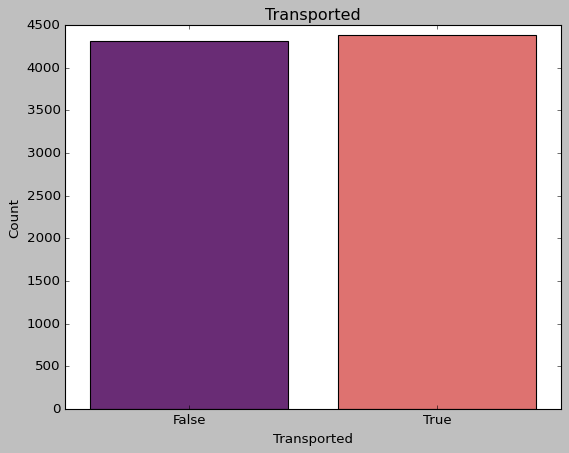

In [13]:
# Change this to exploding pychart
sns.countplot(x='Transported', data=data, palette='magma')
#Add title and axis names
plt.title('Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.savefig('../plots/transported.png')
plt.show()


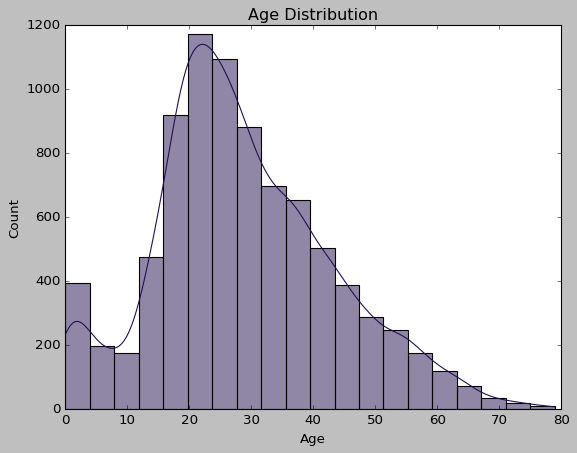

In [17]:
sns.histplot(data['Age'], kde=True, bins=20, palette='magma')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../plots/age_distribution.png')
plt.show()

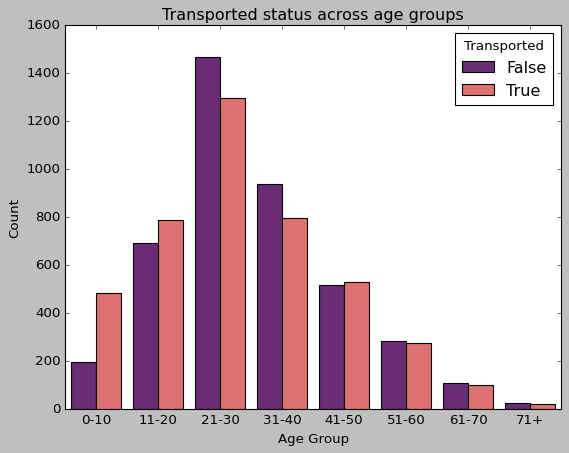

In [18]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
sns.countplot(x='AgeGroup', hue='Transported', data=data, palette='magma')
plt.title('Transported status across age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('../plots/transported_age_group.png')
plt.show()


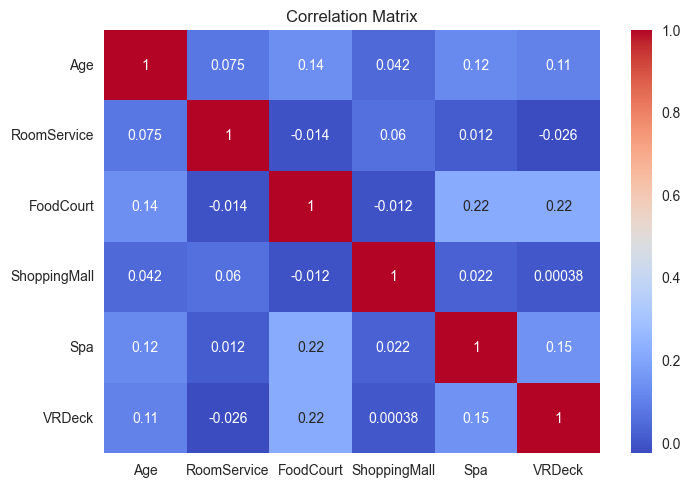

In [153]:
# Correlation matrix
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../plots/correlation_matrix.png')
plt.show()

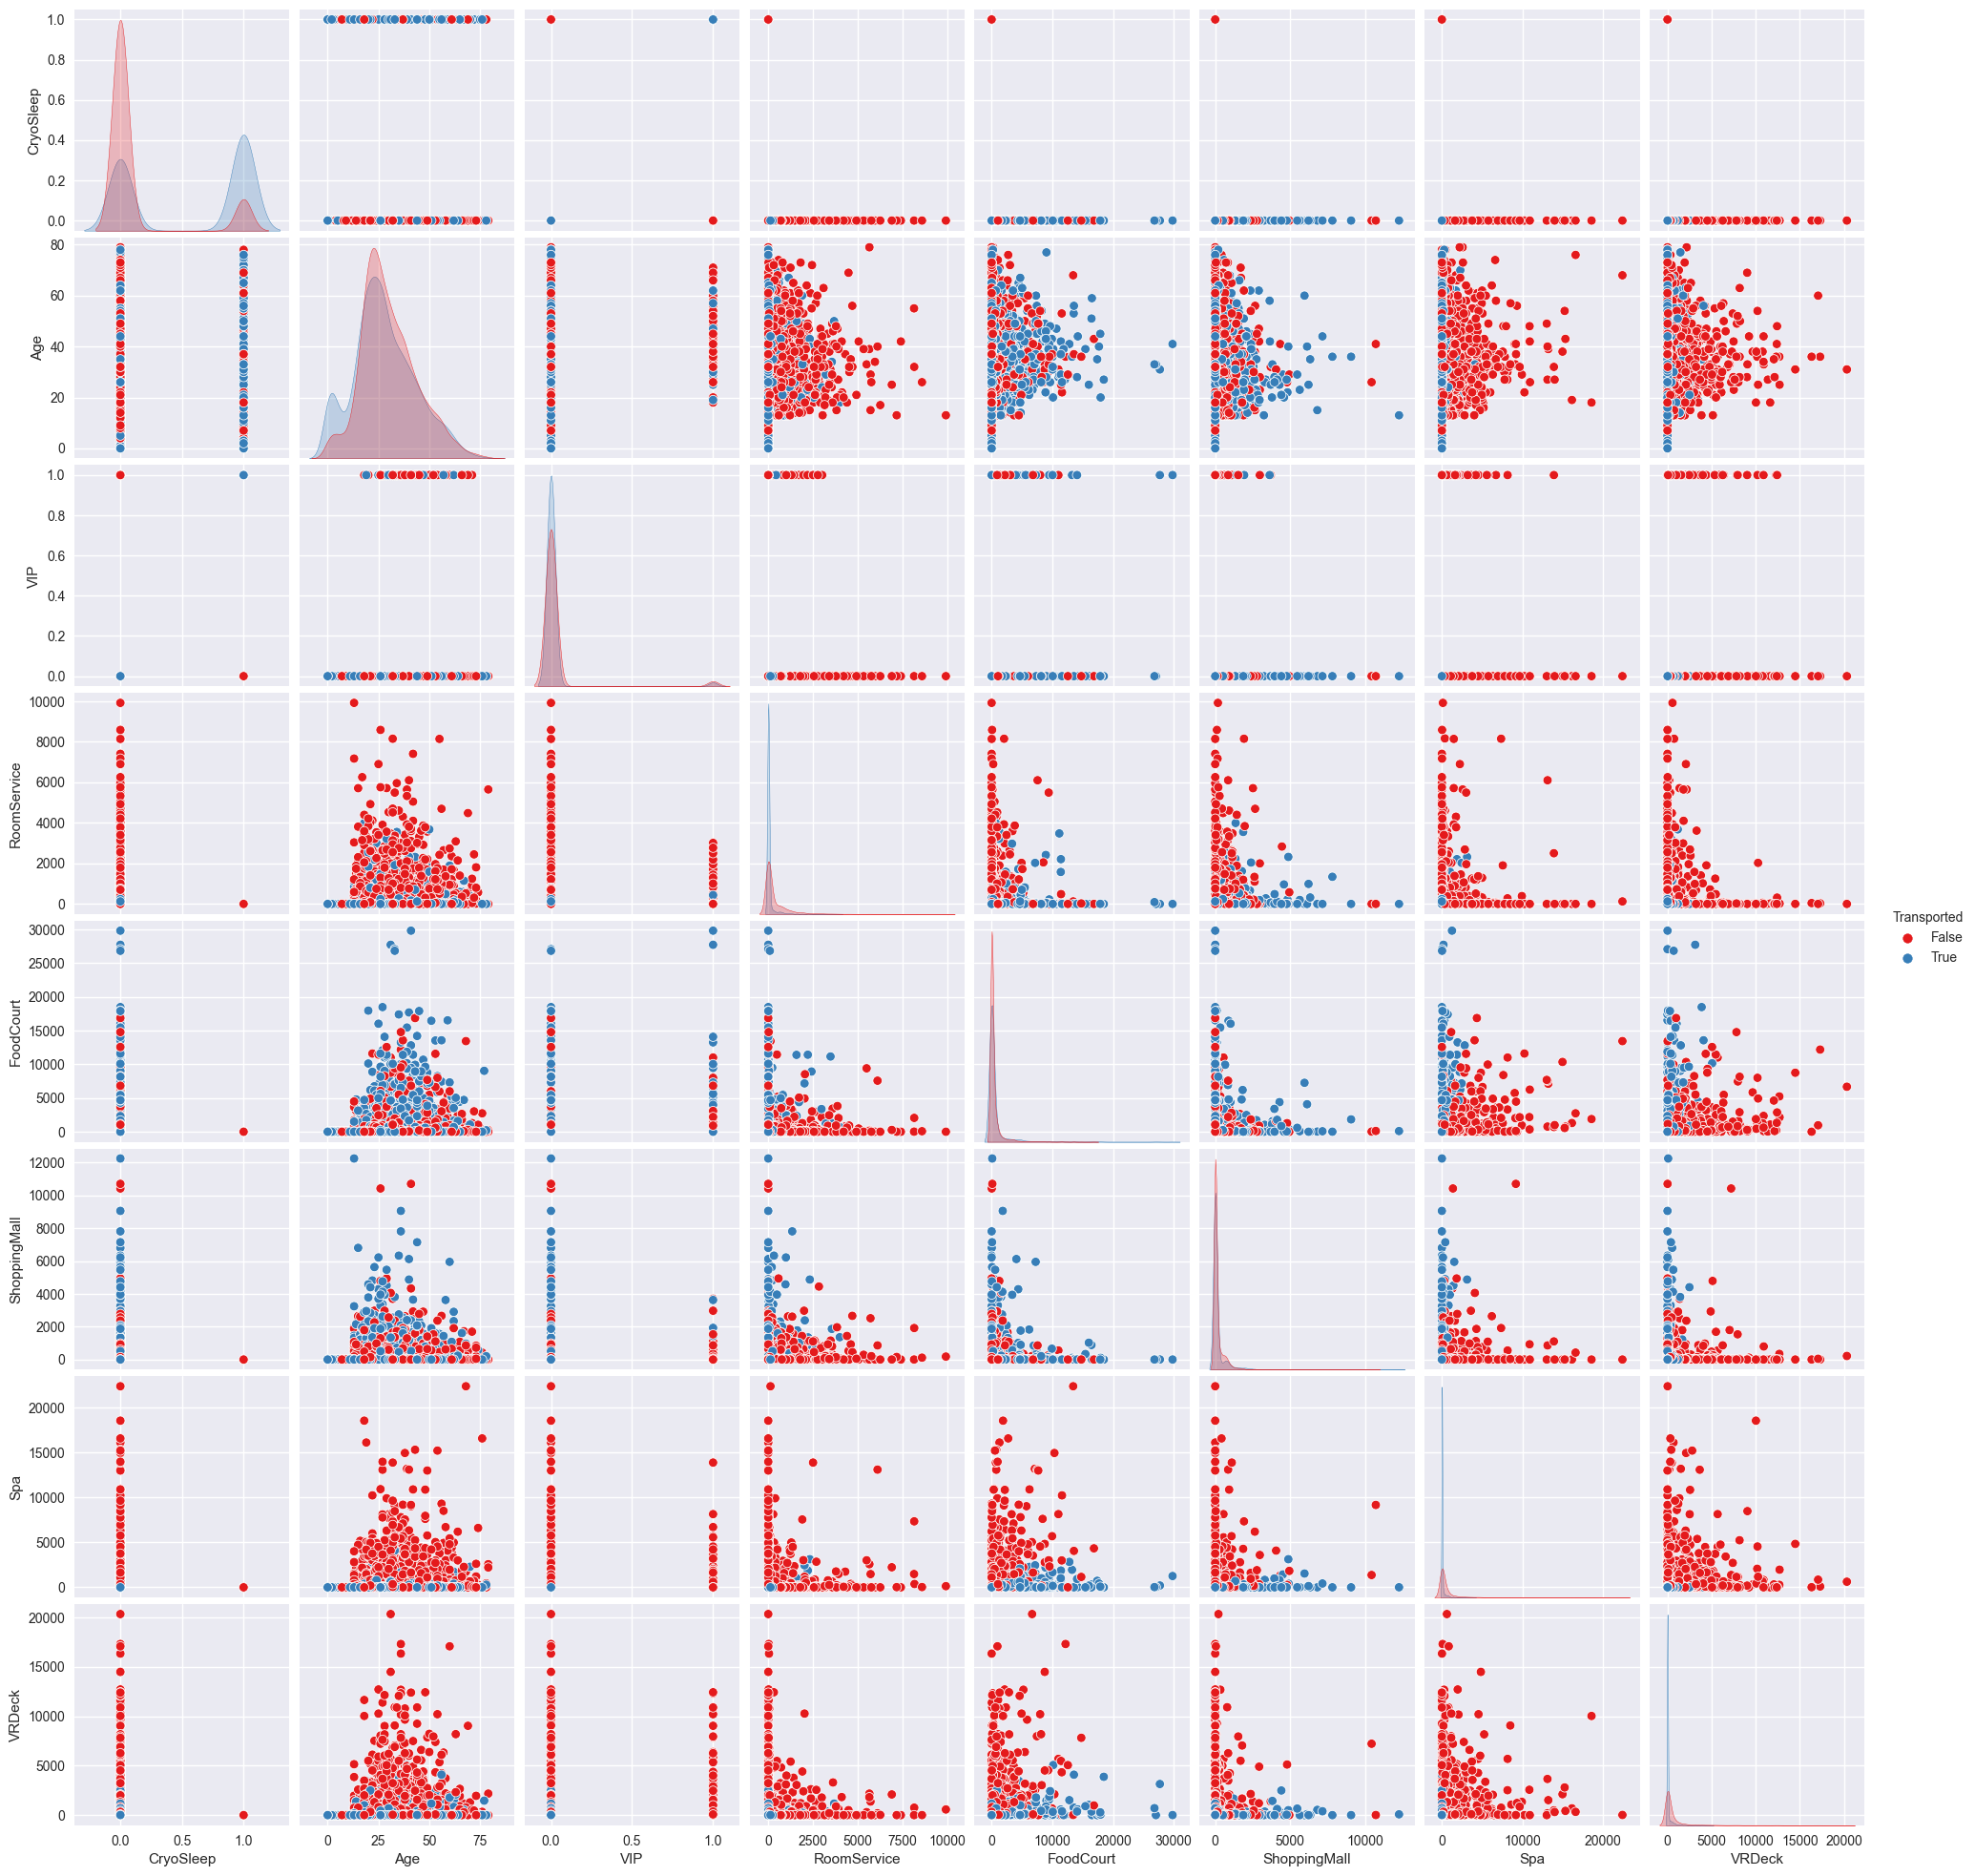

In [111]:
sns.pairplot(data, hue='Transported', palette='Set1')
plt.gcf().set_size_inches(20, 20)
plt.title('Pairplot')
plt.savefig('../plots/pairplot.png')
plt.show()

<h2> Multivariate analysis </h2>